In [48]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
import pandas as pd

In [49]:
# Load the dataset
df = pd.read_csv(r"C:\Users\oscar\Downloads\data_set_hackathon.csv")


In [50]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route
0,13.07.2009,28.01.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001
1,15.07.2009,24.03.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001
2,16.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001
3,17.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001
4,21.07.2009,01.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001
...,...,...,...,...,...,...,...,...,...,...,...
2415,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003
2416,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003
2417,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003
2418,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003


In [51]:
from datetime import datetime
import pandas as pd
def convert_date_format(original_date):
    original_format = "%d.%m.%Y"
    parsed_date = datetime.strptime(original_date, original_format)
    new_format = "%Y-%m-%d"
    formatted_date = parsed_date.strftime(new_format)
    return formatted_date

# Apply the function to the specified columns
df['order_date'] = df['order_date'].apply(convert_date_format)
df['requested_delivery_date'] = df['requested_delivery_date'].apply(convert_date_format)

# Display the modified DataFrame
print(df)

      order_date requested_delivery_date Customer Country Code Product Code  \
0     2009-07-13              2010-01-28                    RU    L10705000   
1     2009-07-15              2010-03-24                    RU    L10705000   
2     2009-07-16              2010-02-04                    RU    L10705000   
3     2009-07-17              2010-02-04                    RU    L10705000   
4     2009-07-21              2010-02-01                    RU    L10705000   
...          ...                     ...                   ...          ...   
2415  2011-07-13              2012-02-15                    HR    L12919200   
2416  2011-07-13              2012-02-15                    HR    L12919200   
2417  2011-07-13              2012-02-15                    HR    L12919200   
2418  2011-07-13              2012-02-15                    HR    L12919200   
2419  2012-01-23              2012-04-15                    RU    L12919200   

                      Description order_type  Custo

In [52]:
# Convert 'Requested Delivery Date' and 'Order Date' to datetime objects
df['order_date'] = pd.to_datetime(df['order_date'])
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'])

# Calculate the time difference in days
df['Time Difference'] = (df['requested_delivery_date'] - df['order_date']).dt.days

# Add 'Fast Demand' column
df['Fast Demand'] = np.where(df['Time Difference'] > 30, 1, 0)

# Drop the temporary 'Time Difference' column if not needed
df = df.drop('Time Difference', axis=1)


In [53]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Fast Demand
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,1
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,1
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,1
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003,1
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003,1
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003,1
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003,1


In [54]:
df['items'].replace('\\N', 0, inplace=True)
df['items'] = pd.to_numeric(df['items'])

In [55]:
df['Product Code'].unique()

array(['L10705000', 'L10705100', 'L10705200', 'L10705300', 'L10705400',
       'L10705500', 'L10705600', 'L10705700', 'L10850600', 'L10850700',
       'L10850800', 'L10850900', 'L10852800', 'L10852900', 'L10853100',
       'L12134400', 'L12134500', 'L12134600', 'L12134700', 'L12135800',
       'L12135900', 'L12136000', 'L12136100', 'L12916800', 'L12916900',
       'L12917000', 'L12917100', 'L12917700', 'L12917800', 'L12917900',
       'L12918000', 'L12918400', 'L12918500', 'L12918600', 'L12918700',
       'L12918800', 'L12918900', 'L12919000', 'L12919100', 'L12919200'],
      dtype=object)

In [56]:
df['Curr'].unique()

array(['RUB', 'DKK', 'NOK', 'EUR', 'CHF', 'SEK', 'CZK', 'PLN', 'GBP'],
      dtype=object)

In [57]:
# Example exchange rates (please replace these with actual rates)
exchange_rates = {
    'RUB': 0.014,  
    'DKK': 0.1342,  
    'NOK': 0.0847,
    'CHF': 0.9478,
    'SEK': 0.0882,
    'CZK': 0.0409,
    'PLN': 0.2308,
    'GBP': 1.1684}

    
# Convert 'value' to numeric
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Function to convert to EUR
def convert_to_eur(row):
    rate = exchange_rates.get(row['Curr'], 1)  # Default rate is 1 if currency is already in EUR or not found
    return row['value'] * rate

# Apply the conversion
df['value_eu'] = df.apply(convert_to_eur,axis=1)

In [59]:
# Calculate the average price per product code
average_price_per_product = df.groupby('Product Code')['value_eu'].mean()

# Map the average price to a new column in the DataFrame
df['average_price'] = df['Product Code'].map(average_price_per_product)

# Display the DataFrame to verify the new column
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Fast Demand,value_eu,average_price
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,32.7180,55.096075
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,1,142.2435,55.096075
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,1,41.8950,55.096075
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,1,56.8575,55.096075
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,1,30.9225,55.096075


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2420 non-null   datetime64[ns]
 1   requested_delivery_date  2420 non-null   datetime64[ns]
 2   Customer Country Code    2420 non-null   object        
 3   Product Code             2420 non-null   object        
 4   Description              2420 non-null   object        
 5   order_type               2420 non-null   object        
 6   Customer Order Code      2420 non-null   int64         
 7   value                    2420 non-null   float64       
 8   Curr                     2420 non-null   object        
 9   items                    2420 non-null   int64         
 10  Route                    2420 non-null   object        
 11  Fast Demand              2420 non-null   int32         
 12  value_eu                 2420 non-

In [61]:
df['items'] = pd.to_numeric(df['items'], errors='coerce')

### DELIVERY IN Autumn and  Feb to Apr

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2420 non-null   datetime64[ns]
 1   requested_delivery_date  2420 non-null   datetime64[ns]
 2   Customer Country Code    2420 non-null   object        
 3   Product Code             2420 non-null   object        
 4   Description              2420 non-null   object        
 5   order_type               2420 non-null   object        
 6   Customer Order Code      2420 non-null   int64         
 7   value                    2420 non-null   float64       
 8   Curr                     2420 non-null   object        
 9   items                    2420 non-null   int64         
 10  Route                    2420 non-null   object        
 11  Fast Demand              2420 non-null   int32         
 12  value_eu                 2420 non-

### Delivery in Aug and Sep, and Feb to Apr

<Figure size 1200x600 with 0 Axes>

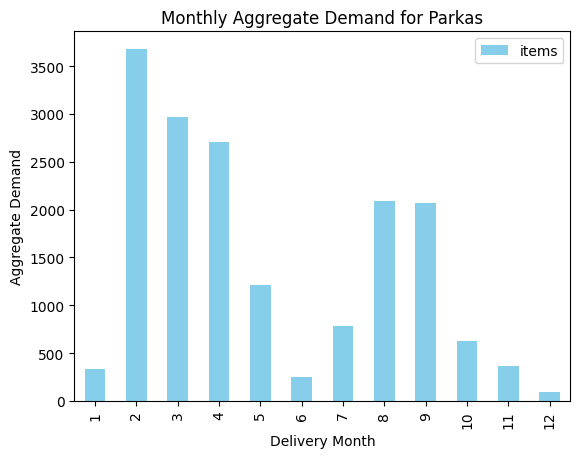

In [63]:
# Aggregate Demand
# By month
# Extract month from 'Requested Delivery Date'
df['DELIVERY_MONTH'] = df['requested_delivery_date'].dt.month

# Aggregate demand by month
monthly_aggregate_demand = df.groupby('DELIVERY_MONTH')['items'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
monthly_aggregate_demand.plot(kind='bar', x='DELIVERY_MONTH', y='items', color='skyblue')
plt.title('Monthly Aggregate Demand for Parkas')
plt.xlabel('Delivery Month')
plt.ylabel('Aggregate Demand')
plt.show()


### Make orders in SUMMER

<Figure size 1200x600 with 0 Axes>

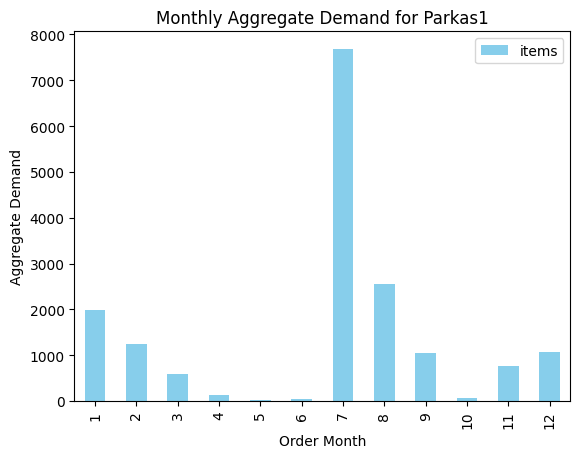

In [64]:
#By order date
df['ORDER_MONTH'] = df['order_date'].dt.month

# Aggregate demand by month
monthly_aggregate_demand2 = df.groupby('ORDER_MONTH')['items'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
monthly_aggregate_demand2.plot(kind='bar', x='ORDER_MONTH', y='items', color='skyblue')
plt.title('Monthly Aggregate Demand for Parkas1')
plt.xlabel('Order Month')
plt.ylabel('Aggregate Demand')
plt.show()

In [65]:
df.columns

Index(['order_date', 'requested_delivery_date', 'Customer Country Code',
       'Product Code', 'Description', 'order_type', 'Customer Order Code',
       'value', 'Curr', 'items', 'Route', 'Fast Demand', 'value_eu',
       'average_price', 'DELIVERY_MONTH', 'ORDER_MONTH'],
      dtype='object')

### Delivery season

<Figure size 1200x600 with 0 Axes>

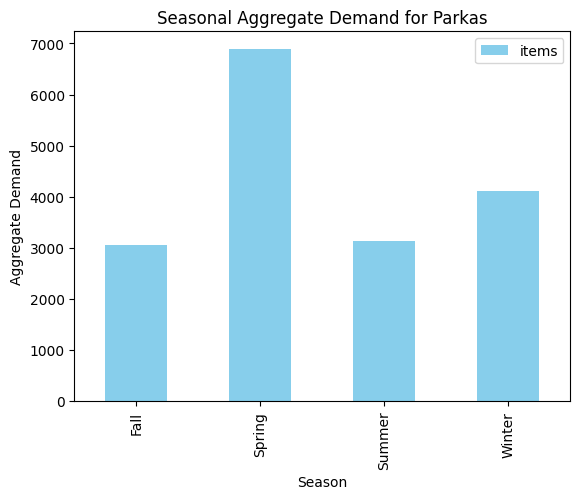

In [66]:
# By season (assuming 3-month seasons)
df['SEASON'] = df['DELIVERY_MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))
seasonal_aggregate_demand3 = df.groupby('SEASON')['items'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
seasonal_aggregate_demand3.plot(kind='bar', x='SEASON', y='items', color='skyblue')
plt.title('Seasonal Aggregate Demand for Parkas')
plt.xlabel('Season')
plt.ylabel('Aggregate Demand')
plt.show()


### Order season

Order in Autumn

<Figure size 1200x600 with 0 Axes>

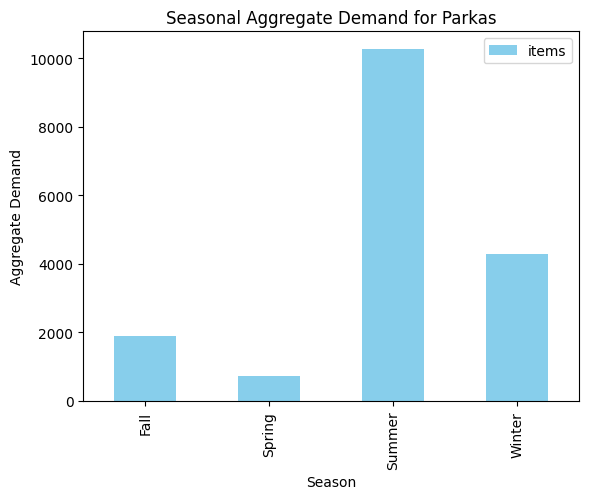

In [67]:
# By season (assuming 3-month seasons)
df['SEASON'] = df['ORDER_MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))
seasonal_aggregate_demand3 = df.groupby('SEASON')['items'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
seasonal_aggregate_demand3.plot(kind='bar', x='SEASON', y='items', color='skyblue')
plt.title('Seasonal Aggregate Demand for Parkas')
plt.xlabel('Season')
plt.ylabel('Aggregate Demand')
plt.show()

In [68]:
df.columns

Index(['order_date', 'requested_delivery_date', 'Customer Country Code',
       'Product Code', 'Description', 'order_type', 'Customer Order Code',
       'value', 'Curr', 'items', 'Route', 'Fast Demand', 'value_eu',
       'average_price', 'DELIVERY_MONTH', 'ORDER_MONTH', 'SEASON'],
      dtype='object')

### Order time at almost the least prices which is July to Aug

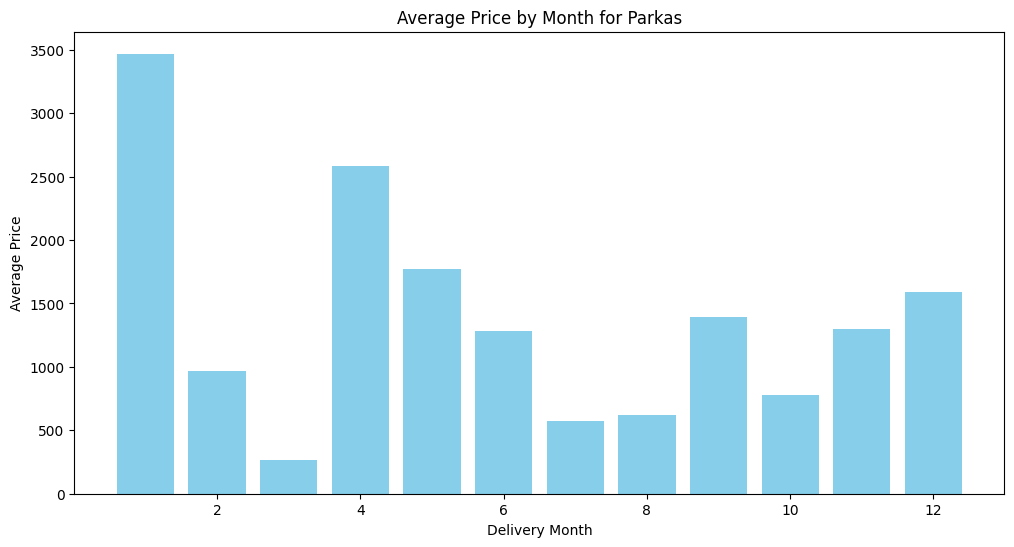

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided structure

# Aggregate Average Price by Month
df['DELIVERY_MONTH'] = df['requested_delivery_date'].dt.month

# Calculate average price by month
average_price_by_month = df.groupby('DELIVERY_MONTH')['value'].mean().reset_index()

# Plotting Average Price by Month
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_month['DELIVERY_MONTH'], average_price_by_month['value'], color='skyblue')
plt.title('Average Price by Month for Parkas')
plt.xlabel('Delivery Month')
plt.ylabel('Average Price')
plt.show()

### Summer  Jun to Aug is at the least price point

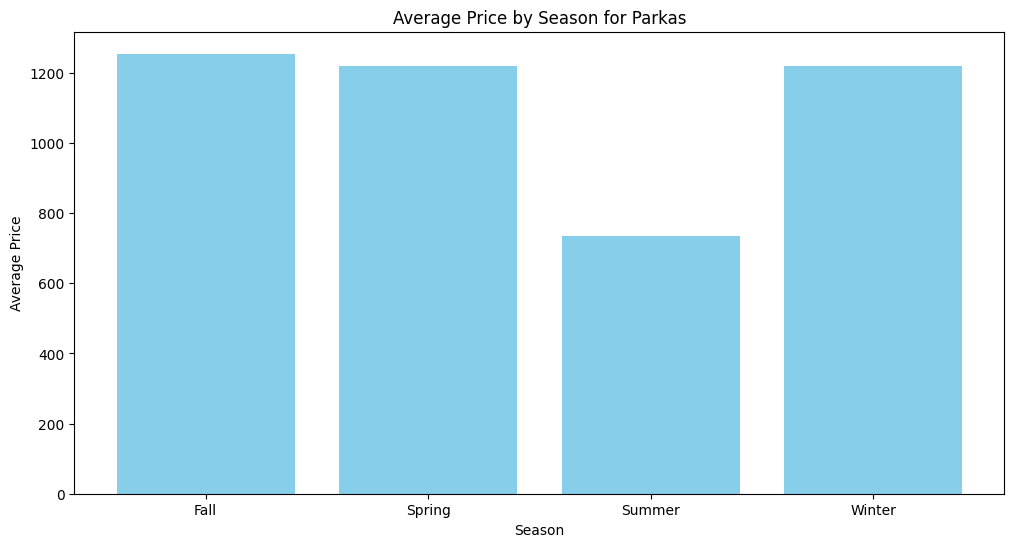

In [70]:
# Aggregate Average Price by Season
df['SEASON'] = df['DELIVERY_MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))

# Calculate average price by season
average_price_by_season = df.groupby('SEASON')['value'].mean().reset_index()

# Plotting Average Price by Season
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_season['SEASON'], average_price_by_season['value'], color='skyblue')
plt.title('Average Price by Season for Parkas')
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.show()

In [ ]:
# Extract month from 'Requested Delivery Date'
df['DELIVERY_MONTH'] = df['requested_delivery_date'].dt.month

# Create a 'SEASON' column based on 'DELIVERY_MONTH'
df['SEASON'] = df['DELIVERY_MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))

# Calculate monthly and seasonal quantity for each product
monthly_quantity = df.groupby(['Product Code', 'requested_delivery_date'])['items'].sum().reset_index()
seasonal_quantity = df.groupby(['Product Code', 'SEASON'])['items'].sum().reset_index()

# Display the results
print("Monthly Quantity:")
print(monthly_quantity)

print("\nSeasonal Quantity:")
print(seasonal_quantity)


In [ ]:
# Calculate monthly average price for each product
df['Monthly Average Price'] = df['value'] / df['items']

# Group by product code and month, then calculate the mean of the monthly average price
monthly_avg_price = df.groupby(['Product Code', 'DELIVERY_MONTH'])['Monthly Average Price'].mean().reset_index()

# Create a line chart for each product
plt.figure(figsize=(12, 6))

# Iterate through unique product codes
for product_code in monthly_avg_price['Product Code'].unique():
    product_data = monthly_avg_price[monthly_avg_price['Product Code'] == product_code]
    plt.plot(product_data['DELIVERY_MONTH'], product_data['Monthly Average Price'], label=f'Product {product_code}')

# Set labels and title
plt.title('Monthly Average Price for Each Product')
plt.xlabel('Delivery Month')
plt.ylabel('Monthly Average Price')

# Display legend
plt.legend()

# Show the line chart
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Convert 'requested_delivery_date' to datetime type
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'])

# Extract year and month from 'requested_delivery_date'
df['DELIVERY_YEAR'] = df['requested_delivery_date'].dt.year
df['DELIVERY_MONTH'] = df['requested_delivery_date'].dt.month

# Aggregate demand by year and month
monthly_demand_by_year = df.groupby(['DELIVERY_YEAR', 'DELIVERY_MONTH'])['items'].sum().reset_index()

# Create a line chart for monthly demand by year
plt.figure(figsize=(12, 6))

# Iterate through unique years
for year in monthly_demand_by_year['DELIVERY_YEAR'].unique():
    year_data = monthly_demand_by_year[monthly_demand_by_year['DELIVERY_YEAR'] == year]
    plt.plot(year_data['DELIVERY_MONTH'], year_data['items'], label=f'Year {year}')

# Set labels and title
plt.title('Monthly Demand by Year')
plt.xlabel('Delivery Month')
plt.ylabel('Monthly Demand')

# Display legend
plt.legend()

# Show the line chart
plt.show()


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Convert 'requested_delivery_date' to datetime type
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'])

# Extract year and month from 'requested_delivery_date'
df['DELIVERY_YEAR'] = df['requested_delivery_date'].dt.year
df['DELIVERY_MONTH'] = df['requested_delivery_date'].dt.month

# Aggregate demand by year and month
monthly_demand_by_year = df.groupby(['DELIVERY_YEAR', 'DELIVERY_MONTH'])['items'].sum().reset_index()

# Display the table
print(monthly_demand_by_year)


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Convert 'requested_delivery_date' to datetime type
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'])

# Extract year and month from 'requested_delivery_date'
df['DELIVERY_YEAR'] = df['requested_delivery_date'].dt.year
df['DELIVERY_MONTH'] = df['requested_delivery_date'].dt.month

# Define seasons based on months
seasons = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter',
}

# Map the seasons to each month
df['SEASON'] = df['DELIVERY_MONTH'].map(seasons)

# Aggregate demand by year and season
seasonal_demand_by_year = df.groupby(['DELIVERY_YEAR', 'SEASON'])['items'].sum().reset_index()

# Display the table
print(seasonal_demand_by_year)


In [71]:
import pandas as pd

# List of columns to one-hot encode
columns_to_encode = ['SEASON']

# Perform one-hot encoding
df_2 = pd.get_dummies(df, columns=columns_to_encode)

In [72]:
df_2

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Fast Demand,value_eu,average_price,DELIVERY_MONTH,ORDER_MONTH,SEASON_Fall,SEASON_Spring,SEASON_Summer,SEASON_Winter
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,32.7180,55.096075,1,7,False,False,False,True
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,1,142.2435,55.096075,3,7,False,True,False,False
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,1,41.8950,55.096075,2,7,False,False,False,True
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,1,56.8575,55.096075,2,7,False,False,False,True
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,1,30.9225,55.096075,2,7,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003,1,128.5200,108.223857,2,7,False,False,False,True
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003,1,128.5200,108.223857,2,7,False,False,False,True
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003,1,128.5200,108.223857,2,7,False,False,False,True
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003,1,107.1000,108.223857,2,7,False,False,False,True


# Choice Model

In [86]:
X = df_2[['SEASON_Fall','SEASON_Spring', 'SEASON_Summer', 'SEASON_Winter', 'average_price']]   
y = df_2['Product Code']

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a LogisticRegression model with increased max_iter
logistic_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')  # Increase max_iter to a larger value

# Fit the logistic regression model on the scaled data
logistic_reg.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = logistic_reg.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Confusion Matrix:
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 20]]
Precision: 0.19568725892921515
Recall: 0.3347107438016529
F1-score: 0.23049069128113128


c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
print(logistic_reg.coef_)

[[-4.41934410e-01 -5.88782839e-03 -2.64945155e-01  9.36339178e-01
   9.19558833e-03]
 [-1.94532431e-01 -3.33792311e-01 -5.08809383e-03  4.26333435e-01
   8.66358922e-03]
 [-2.27187159e-01 -4.04332488e-01 -1.28535247e-01  8.94888258e-01
   3.17636215e-04]
 [-3.40687677e-01 -4.48040274e-01 -2.00019155e-01  7.62534619e-01
   1.34041509e-02]
 [-4.44608370e-01 -1.95753698e-01 -1.64954374e-01  1.02635624e+00
   9.26756854e-03]
 [-2.58855239e-01 -5.69395650e-01 -1.48185315e-01  8.57890355e-01
   1.20721092e-02]
 [-3.51532697e-01 -4.71547658e-01 -1.03775693e-01  1.14009139e+00
   3.15670760e-03]
 [-1.70305269e-01 -2.81890010e-01  9.57103528e-03  6.56300327e-01
  -5.27744555e-03]
 [ 1.87149011e+00 -2.10509907e+00  6.26433462e-01 -1.02118934e+00
   3.29088987e-02]
 [ 6.96762079e-01 -2.93835951e-01  1.38193695e-01 -1.23027320e-01
  -4.31032494e-01]
 [ 3.20217256e-01 -2.49599887e+00  4.71193890e-01 -1.24413912e+00
   7.26153116e-02]
 [ 9.50219441e-01 -7.33691729e-01  4.15408827e-01 -3.25055311e-01

In [75]:
print(logistic_reg.coef_)

[[-9.81446003e-01  1.00112940e-01]
 [-5.36745366e-01  6.01755368e-02]
 [-6.45807430e-01  6.89131318e-02]
 [-9.91525665e-01  9.73624189e-02]
 [-9.17927097e-01  9.65126698e-02]
 [-9.23815116e-01  8.74166426e-02]
 [-8.81814601e-01  9.03032259e-02]
 [-3.98977185e-01  4.73070868e-02]
 [ 1.75713875e+00 -1.19102323e-01]
 [ 1.61707037e+00 -1.49920825e-01]
 [-5.47747121e-01  1.05438965e-01]
 [ 2.04321654e+00 -1.81763704e-01]
 [ 3.26348218e+00 -3.63263262e-01]
 [-2.92465884e+00  2.13567223e-01]
 [ 9.41313680e-01 -7.51553610e-02]
 [ 2.73283477e+00 -2.55639997e-01]
 [ 2.87714468e+00 -2.95038132e-01]
 [ 1.08228202e+00 -3.50456675e-02]
 [ 2.37941747e+00 -2.26660093e-01]
 [ 5.62985448e-01  2.48596657e-02]
 [ 3.66062588e+00 -4.32544545e-01]
 [ 3.12373763e+00 -3.40728926e-01]
 [ 2.78188590e+00 -2.64710983e-01]
 [-4.37540115e-01  7.57143769e-02]
 [-1.29239524e+00  1.37952660e-01]
 [-4.92732322e-01  7.33840263e-02]
 [-1.93273228e-02  2.81828952e-02]
 [-1.37042519e+00  1.31072610e-01]
 [-2.08518408e+00  1

In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs'), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
y_pred = grid_search.predict(X_test)

# Get the class names from the best estimator
class_names = grid_search.best_estimator_.classes_

# Generate a classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

Best parameters found:  {'C': 100, 'max_iter': 200}
Confusion Matrix:
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 59]]

Classification Report:
              precision    recall  f1-score   support

   L10705000       0.00      0.00      0.00         8
   L10705100       0.00      0.00      0.00         5
   L10705200       0.00      0.00      0.00         7
   L10705300       0.88      0.78      0.82         9
   L10705400       0.00      0.00      0.00        16
   L10705500       0.00      0.00      0.00         7
   L10705600       0.00      0.00      0.00        10
   L10705700       0.00      0.00      0.00         2
   L10850600       0.95      1.00      0.97        37
   L10850700       0.60      1.00      0.75         6
   L10850800       0.96      0.96      0.96        24
   L10850900       0.00      0.00      0.00        18
   L10852800       0.15      0.15      0.15    

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'C': [100,200,300],
    'max_iter': [150,200]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs'), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
y_pred = grid_search.predict(X_test)

# Get the class names from the best estimator
class_names = grid_search.best_estimator_.classes_

# Access the cv_results_
cv_results = grid_search.cv_results_

# Convert the cv_results_ to a pandas DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Display the DataFrame
print(cv_results_df)

# Generate a classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

Best parameters found:  {'C': 300, 'max_iter': 150}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.081860      0.011932         0.000599        0.000489     100   
1       0.100419      0.007408         0.000797        0.000405     100   
2       0.079139      0.003272         0.000592        0.000484     200   
3       0.099297      0.004881         0.000600        0.000490     200   
4       0.078060      0.002981         0.000398        0.000487     300   
5       0.100646      0.005818         0.001083        0.000667     300   

  param_max_iter                       params  split0_test_score  \
0            150  {'C': 100, 'max_iter': 150}           0.673554   
1            200  {'C': 100, 'max_iter': 200}           0.698347   
2            150  {'C': 200, 'max_iter': 150}           0.735537   
3            200  {'C': 200, 'max_iter': 200}           0.735537   
4            150  {'C': 300, 'max_iter': 150}           0.735537   
5            2

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'C': [300, 400, 500],
    'max_iter': [130, 140, 150]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs'), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
y_pred = grid_search.predict(X_test)

# Get the class names from the best estimator
class_names = grid_search.best_estimator_.classes_

# Access the cv_results_
cv_results = grid_search.cv_results_

# Convert the cv_results_ to a pandas DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Display the DataFrame
print(cv_results_df)

# Generate a classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

Best parameters found:  {'C': 400, 'max_iter': 150}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.085670      0.026707         0.000615        0.000502     300   
1       0.073690      0.002461         0.000605        0.000494     300   
2       0.079193      0.004244         0.000838        0.000426     300   
3       0.071790      0.004750         0.000596        0.000486     400   
4       0.074500      0.002507         0.000396        0.000792     400   
5       0.080931      0.004263         0.000590        0.000482     400   
6       0.066802      0.003152         0.001058        0.000059     500   
7       0.074230      0.002727         0.000797        0.000399     500   
8       0.090685      0.023236         0.000608        0.000497     500   

  param_max_iter                       params  split0_test_score  \
0            130  {'C': 300, 'max_iter': 130}           0.735537   
1            140  {'C': 300, 'max_iter': 140}           0.735

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:146

## Found the best param and run the LR

In [87]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Set up the hyperparameter grid
# Since we are using 'average_price', which is a continuous variable, we should scale our features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a LogisticRegression model with the best parameters found
logistic_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=400, max_iter=150)

# Fit the logistic regression model on the scaled training data
logistic_reg.fit(X_train_scaled, y_train)

# Predict the target values on the scaled test data
y_pred = logistic_reg.predict(X_test_scaled)

# Display the DataFrame
print(cv_results_df)

# Generate a classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.085670      0.026707         0.000615        0.000502     300   
1       0.073690      0.002461         0.000605        0.000494     300   
2       0.079193      0.004244         0.000838        0.000426     300   
3       0.071790      0.004750         0.000596        0.000486     400   
4       0.074500      0.002507         0.000396        0.000792     400   
5       0.080931      0.004263         0.000590        0.000482     400   
6       0.066802      0.003152         0.001058        0.000059     500   
7       0.074230      0.002727         0.000797        0.000399     500   
8       0.090685      0.023236         0.000608        0.000497     500   

  param_max_iter                       params  split0_test_score  \
0            130  {'C': 300, 'max_iter': 130}           0.735537   
1            140  {'C': 300, 'max_iter': 140}           0.735537   
2            150  {'C': 300, 'max_iter': 150}

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:146

## The Coef of the Logistic Regression model shows that season are affecting the choice of product for most of the product, but the Average price is having the greatest affect on product choosing.

In [90]:
# Get the coefficients from the logistic regression model
coefficients = logistic_reg.coef_

# Get the feature names
feature_names = X.columns

# Iterate over the classes (rows of the coef_ array)
for index, class_coefficients in enumerate(coefficients):
    # Print the class
    print(f"Class {logistic_reg.classes_[index]} coefficients:")
    # Combine feature names and coefficients
    features_coefficients = zip(feature_names, class_coefficients)
    # Print the feature names with their corresponding coefficient
    for feature, coefficient in features_coefficients:
        print(f"{feature}: {coefficient}")
    print()

Class L10705000 coefficients:
SEASON_Fall: -14.642784141135158
SEASON_Spring: 14.149479220118439
SEASON_Summer: -12.565687295337314
SEASON_Winter: 7.969580641978834
average_price: -11.213885282790805

Class L10705100 coefficients:
SEASON_Fall: -23.78159416108029
SEASON_Spring: 10.753390500708218
SEASON_Summer: 5.066664203595166
SEASON_Winter: 5.774241040491048
average_price: 34.207001937604296

Class L10705200 coefficients:
SEASON_Fall: -11.976793583168707
SEASON_Spring: 11.484511909095142
SEASON_Summer: -10.363026153559819
SEASON_Winter: 6.707522609233469
average_price: -31.471983289945406

Class L10705300 coefficients:
SEASON_Fall: -19.009754485305677
SEASON_Spring: 17.480873582153237
SEASON_Summer: -16.208770423855096
SEASON_Winter: 11.38370468012121
average_price: 41.13300074198739

Class L10705400 coefficients:
SEASON_Fall: -18.191361115725886
SEASON_Spring: 8.990403909540424
SEASON_Summer: 3.1819618557737117
SEASON_Winter: 4.062696683634084
average_price: -10.665908386725853

Cla

## Conclusion: Season is affecting the product choice.